In [1]:
import pandas as pd
df = pd.read_csv('four_cols.csv')

In [2]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

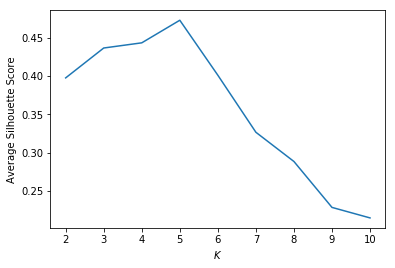

In [3]:
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    cluster_assignments = model.fit_predict(df[zcols])
    
    silhouette_avg = metrics.silhouette_score(df[zcols], cluster_assignments)
    avg_silhouettes.append(silhouette_avg)
    
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

In [5]:
model = cluster.KMeans(n_clusters=5, random_state=10)
model.fit_predict(df[zcols])

km_silhouette = metrics.silhouette_score(df[zcols], model.labels_)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.47313271918107647


In [4]:
bandwidth = cluster.estimate_bandwidth(df[zcols], quantile=0.1)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df[zcols])
ms_silhouette = metrics.silhouette_score(df[zcols], ms.labels_)

print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.47287372381945053
